<a href="https://colab.research.google.com/github/abdelghafourbk/AI-Program/blob/main/KNNHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
df = pd.read_csv('vote_csv.csv')
df.head(6)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y,republican
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN,republican
2,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n,democrat
3,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y,democrat
4,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y,democrat
5,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y,democrat


In [133]:
df.describe()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
count,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y,democrat
freq,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269,267


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   handicapped-infants                     423 non-null    object
 1   water-project-cost-sharing              387 non-null    object
 2   adoption-of-the-budget-resolution       424 non-null    object
 3   physician-fee-freeze                    424 non-null    object
 4   el-salvador-aid                         420 non-null    object
 5   religious-groups-in-schools             424 non-null    object
 6   anti-satellite-test-ban                 421 non-null    object
 7   aid-to-nicaraguan-contras               420 non-null    object
 8   mx-missile                              413 non-null    object
 9   immigration                             428 non-null    object
 10  synfuels-corporation-cutback            414 non-null    object
 11  educat

In [135]:
df.isnull().sum()

handicapped-infants                        12
water-project-cost-sharing                 48
adoption-of-the-budget-resolution          11
physician-fee-freeze                       11
el-salvador-aid                            15
religious-groups-in-schools                11
anti-satellite-test-ban                    14
aid-to-nicaraguan-contras                  15
mx-missile                                 22
immigration                                 7
synfuels-corporation-cutback               21
education-spending                         31
superfund-right-to-sue                     25
crime                                      17
duty-free-exports                          28
export-administration-act-south-africa    104
Class                                       0
dtype: int64

In [136]:
df = df.dropna()

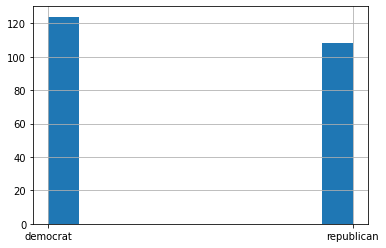

In [137]:
df.Class.hist()

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [139]:
df['Class']=df['Class'].map({'republican':0,'democrat':1})
dff =  df.drop('Class',axis=1)

for column in dff:
  df[column].replace(('y', 'n'), (1, 0), inplace=True)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   handicapped-infants                     232 non-null    int64
 1   water-project-cost-sharing              232 non-null    int64
 2   adoption-of-the-budget-resolution       232 non-null    int64
 3   physician-fee-freeze                    232 non-null    int64
 4   el-salvador-aid                         232 non-null    int64
 5   religious-groups-in-schools             232 non-null    int64
 6   anti-satellite-test-ban                 232 non-null    int64
 7   aid-to-nicaraguan-contras               232 non-null    int64
 8   mx-missile                              232 non-null    int64
 9   immigration                             232 non-null    int64
 10  synfuels-corporation-cutback            232 non-null    int64
 11  education-spending 

In [141]:
df.tail(5)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
423,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,1,1
426,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1,1
427,0,0,0,1,1,1,1,1,0,1,0,1,1,1,0,1,0
430,0,0,1,1,1,1,0,0,1,1,0,1,1,1,0,1,0
431,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,1,1


In [142]:
# features
x= df.drop('Class',axis=1)
#output
y = df['Class']

In [143]:
x.head(3)

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1


In [144]:
y.head(3)

5     1
8     0
19    1
Name: Class, dtype: int64

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [148]:
knn=KNeighborsClassifier() 

knn.fit(x_train,y_train) 


KNeighborsClassifier()

In [149]:
from sklearn.metrics import accuracy_score

In [150]:
#Testing
y_pred=knn.predict(x_test) 
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9787234042553191


In [151]:
n_neighbors=25
scores=[]
for k in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.91
Accuracy for k= 2 is: 0.94
Accuracy for k= 3 is: 0.96
Accuracy for k= 4 is: 0.98
Accuracy for k= 5 is: 0.98
Accuracy for k= 6 is: 0.98
Accuracy for k= 7 is: 0.98
Accuracy for k= 8 is: 0.98
Accuracy for k= 9 is: 0.98
Accuracy for k= 10 is: 0.96
Accuracy for k= 11 is: 0.96
Accuracy for k= 12 is: 0.96
Accuracy for k= 13 is: 0.96
Accuracy for k= 14 is: 0.96
Accuracy for k= 15 is: 0.96
Accuracy for k= 16 is: 0.96
Accuracy for k= 17 is: 0.96
Accuracy for k= 18 is: 0.96
Accuracy for k= 19 is: 0.96
Accuracy for k= 20 is: 0.96
Accuracy for k= 21 is: 0.96
Accuracy for k= 22 is: 0.96
Accuracy for k= 23 is: 0.96
Accuracy for k= 24 is: 0.96


In [152]:
import numpy as np

y = np.array(range(1,25))

In [153]:
y

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [154]:
print(np.argmax(scores)+1)

4


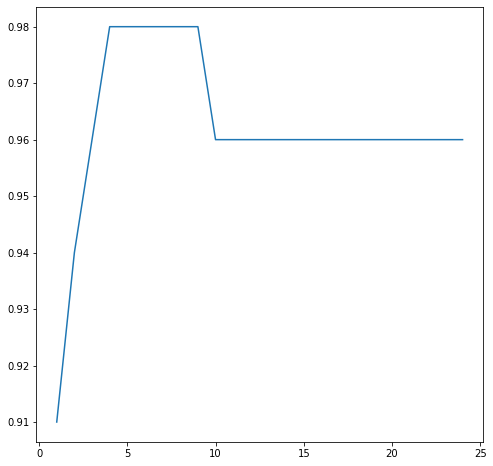

In [155]:
# plot the results to have a better visualization
plt.figure(figsize=(8,8))
plt.plot(range(1,25),scores)